# Logistic Regression
### Create a model to predict whether a user will click on an ad, based on features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('advertising.csv')

In [4]:
data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


In [5]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [32]:
data['Ad Topic Line'].value_counts(sort=reversed)
# Each user got a personalized ad line, so there are no correlation, should drop this column

Cloned 5thgeneration orchestration 1
Synchronized multi-tasking ability 1
Customer-focused impactful success 1
Open-source optimizing parallelism 1
Organic logistical adapter 1
 ..
Enhanced zero tolerance Graphic Interface 1
De-engineered tertiary secured line 1
Reverse-engineered well-modulated capability 1
Integrated coherent pricing structure 1
Virtual 5thgeneration emulation 1
Name: Ad Topic Line, Length: 1000, dtype: int64

In [30]:
data['Country'].value_counts(sort=reversed)
# Should keep country, since there seems to be a correlation

France 9
Czech Republic 9
Peru 8
Turkey 8
Greece 8
 ..
Romania 1
British Indian Ocean Territory (Chagos Archipelago) 1
Germany 1
Aruba 1
Lesotho 1
Name: Country, Length: 237, dtype: int64

# Explore the data

<Axes: >

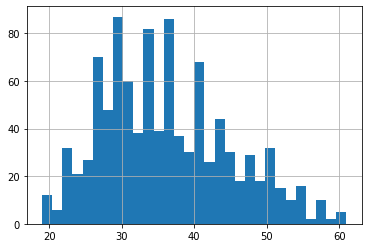

In [7]:
data['Age'].hist(bins=30)

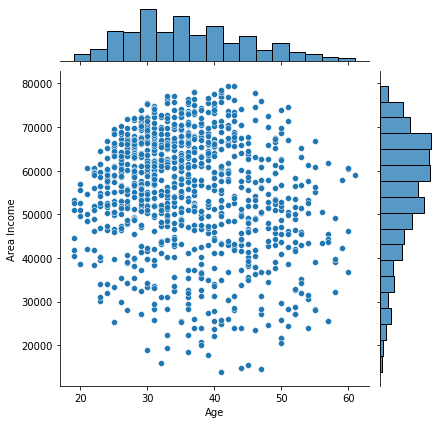

In [8]:
sns.jointplot(data=data, x = 'Age', y = 'Area Income')

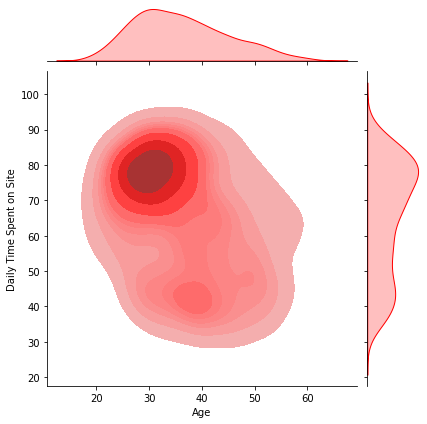

In [9]:
sns.jointplot(data=data, x='Age', y='Daily Time Spent on Site', kind='kde', fill=True, color='red')

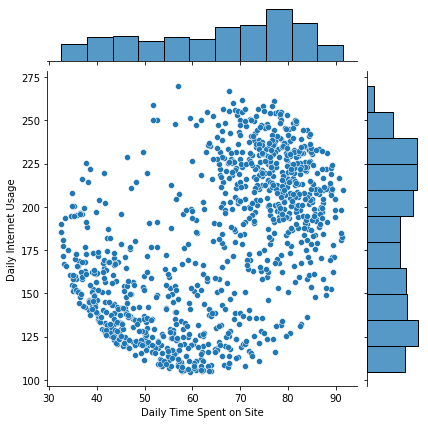

In [10]:
sns.jointplot(data=data, x='Daily Time Spent on Site', y='Daily Internet Usage')

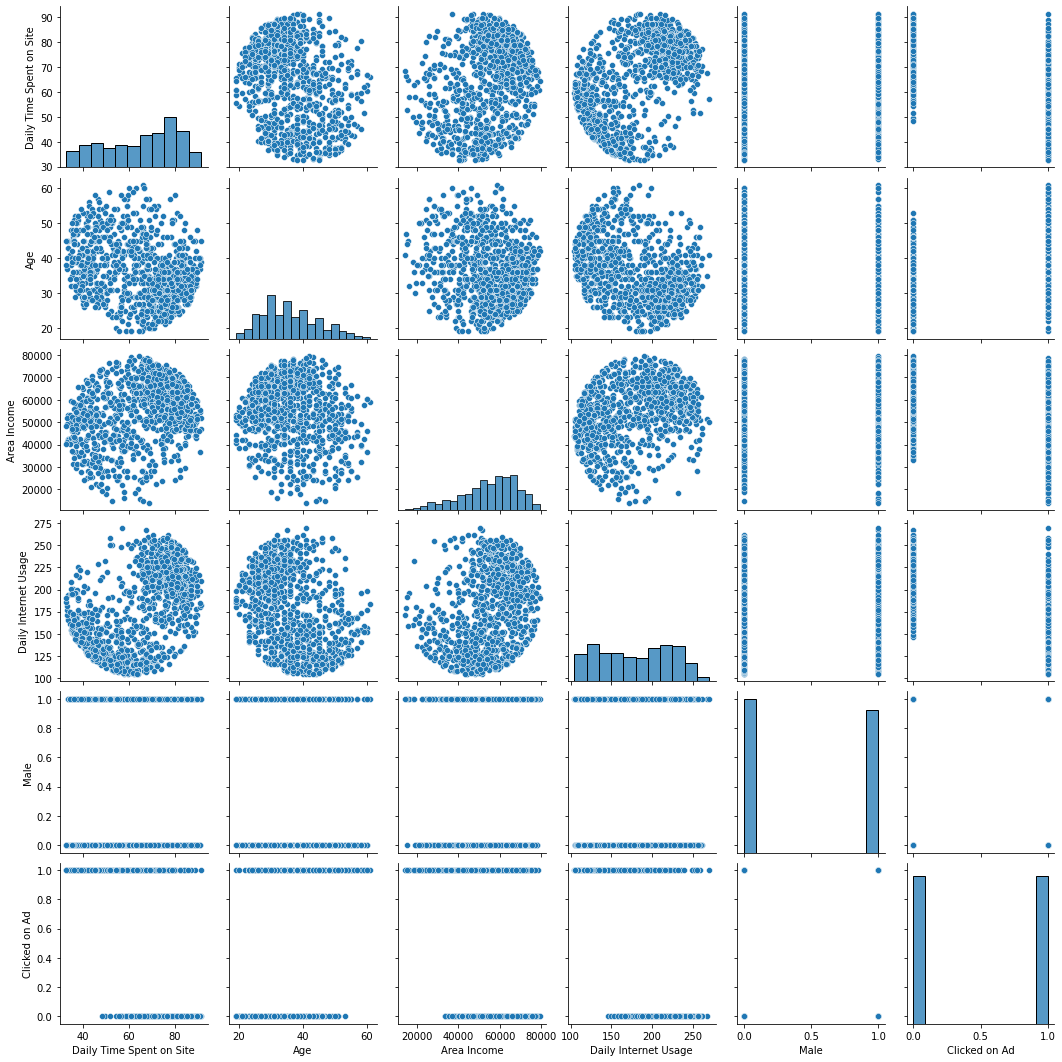

In [11]:
sns.pairplot(data)

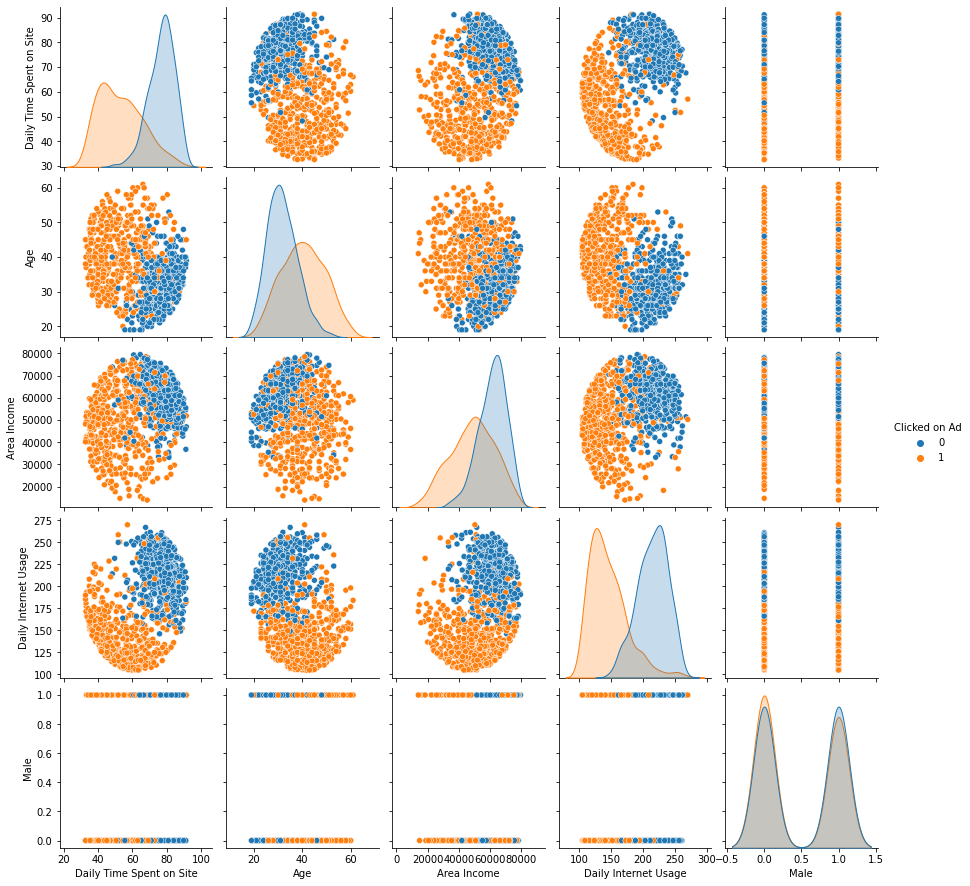

In [12]:
sns.pairplot(data=data, hue='Clicked on Ad')

# One Hot Encoding 'Country'

In [52]:
data['Country'].unique()
# 236 countries

array(['Tunisia', 'Nauru', 'San Marino', 'Italy', 'Iceland', 'Norway',
 'Myanmar', 'Australia', 'Grenada', 'Ghana', 'Qatar', 'Burundi',
 'Egypt', 'Bosnia and Herzegovina', 'Barbados', 'Spain',
 'Palestinian Territory', 'Afghanistan',
 'British Indian Ocean Territory (Chagos Archipelago)',
 'Russian Federation', 'Cameroon', 'Korea', 'Tokelau', 'Monaco',
 'Tuvalu', 'Greece', 'British Virgin Islands',
 'Bouvet Island (Bouvetoya)', 'Peru', 'Aruba', 'Maldives',
 'Senegal', 'Dominica', 'Luxembourg', 'Montenegro', 'Ukraine',
 'Saint Helena', 'Liberia', 'Turkmenistan', 'Niger', 'Sri Lanka',
 'Trinidad and Tobago', 'United Kingdom', 'Guinea-Bissau',
 'Micronesia', 'Turkey', 'Croatia', 'Israel',
 'Svalbard & Jan Mayen Islands', 'Azerbaijan', 'Iran',
 'Saint Vincent and the Grenadines', 'Bulgaria', 'Christmas Island',
 'Canada', 'Rwanda', 'Turks and Caicos Islands', 'Norfolk Island',
 'Cook Islands', 'Guatemala', "Cote d'Ivoire", 'Faroe Islands',
 'Ireland', 'Moldova', 'Nicaragua', 'Montserrat', 'Timor-Leste',
 'Puerto Rico', 'Central African Republic', 'Venezuela',
 'Wallis and Futuna', 'Jersey', 'Samoa',
 'Antarctica (the territory South of 60 deg S)', 'Albania',
 'Hong Kong', 'Lithuania', 'Bangladesh', 'Western Sahara', 'Serbia',
 'Czech Republic', 'Guernsey', 'Tanzania', 'Bhutan', 'Guinea',
 'Madagascar', 'Lebanon', 'Eritrea', 'Guyana',
 'United Arab Emirates', 'Martinique', 'Somalia', 'Benin',
 'Papua New Guinea', 'Uzbekistan', 'South Africa', 'Hungary',
 'Falkland Islands (Malvinas)', 'Saint Martin', 'Cuba',
 'United States Minor Outlying Islands', 'Belize', 'Kuwait',
 'Thailand', 'Gibraltar', 'Holy See (Vatican City State)',
 'Netherlands', 'Belarus', 'New Zealand', 'Togo', 'Kenya', 'Palau',
 'Cambodia', 'Costa Rica', 'Liechtenstein', 'Angola',
 'Equatorial Guinea', 'Mongolia', 'Brazil', 'Chad', 'Portugal',
 'Malawi', 'Singapore', 'Kazakhstan', 'China', 'Vietnam', 'Mayotte',
 'Jamaica', 'Bahamas', 'Algeria', 'Fiji', 'Argentina',
 'Philippines', 'Suriname', 'Guam', 'Antigua and Barbuda',
 'Georgia', 'Jordan', 'Saudi Arabia', 'Sao Tome and Principe',
 'Cyprus', 'Kyrgyz Republic', 'Pakistan', 'Seychelles',
 'Mauritania', 'Chile', 'Poland', 'Estonia', 'Latvia', 'Bahrain',
 'Colombia', 'Brunei Darussalam', 'Taiwan',
 'Saint Pierre and Miquelon', 'Finland',
 'French Southern Territories', 'Sierra Leone', 'Tajikistan',
 'Ecuador', 'Switzerland', 'France', 'Malaysia', 'Mauritius',
 'Japan', 'Greenland', 'Guadeloupe', 'Belgium', 'Honduras',
 'Paraguay', 'French Guiana', 'Northern Mariana Islands',
 'American Samoa', 'Austria', 'Tonga', 'New Caledonia',
 'United States of America', 'Morocco', 'Macedonia', 'Gabon',
 'Uganda', 'Saint Lucia', 'Niue', 'Zambia', 'Congo',
 'Pitcairn Islands', 'Anguilla', 'Sweden', 'Indonesia', 'Mexico',
 'Haiti', 'Gambia', 'El Salvador', 'Libyan Arab Jamahiriya',
 'Saint Barthelemy', 'Reunion', 'Panama', 'Dominican Republic',
 'Zimbabwe', 'Swaziland', 'Saint Kitts and Nevis', 'Burkina Faso',
 'Heard Island and McDonald Islands', 'Bolivia',
 'Netherlands Antilles', 'French Polynesia', 'Germany', 'Malta',
 'Sudan', "Lao People's Democratic Republic", 'Isle of Man',
 'Macao', 'United States Virgin Islands', 'Djibouti', 'Mali',
 'Romania', 'Cayman Islands', 'Ethiopia', 'Uruguay', 'Comoros',
 'Vanuatu', 'Nepal', 'Yemen', 'India', 'Cape Verde', 'Slovenia',
 'Denmark', 'Syrian Arab Republic', 'Andorra', 'Namibia',
 'Slovakia (Slovak Republic)', 'Armenia',
 'South Georgia and the South Sandwich Islands', 'Kiribati',
 'Marshall Islands', 'Bermuda', 'Mozambique', 'Lesotho'],
 dtype=object)

In [135]:
one_hot_encoded_data = pd.get_dummies(data, columns=['Country'])
new_data = one_hot_encoded_data
new_data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Timestamp,Clicked on Ad,Country_Afghanistan,...,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela,Country_Vietnam,Country_Wallis and Futuna,Country_Western Sahara,Country_Yemen,Country_Zambia,Country_Zimbabwe
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,2016-03-27 00:53:11,0,0,...,0,0,0,0,0,0,0,0,0,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,2016-04-04 01:39:02,0,0,...,0,0,0,0,0,0,0,0,0,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,2016-03-13 20:35:42,0,0,...,0,0,0,0,0,0,0,0,0,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,2016-01-10 02:31:19,0,0,...,0,0,0,0,0,0,0,0,0,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,2016-06-03 03:36:18,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,2016-02-11 21:49:00,1,0,...,0,0,0,0,0,0,0,0,0,0
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,2016-04-22 02:07:01,1,0,...,0,0,0,0,0,0,0,0,0,0
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,2016-02-01 17:24:57,1,0,...,0,0,0,0,0,0,0,0,0,0
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,2016-03-24 02:35:54,0,0,...,0,0,0,0,0,0,0,0,0,0


# Logistic Regression

In [137]:
X = new_data.drop(['Clicked on Ad', 'Timestamp', 'Ad Topic Line', 'City'], axis=1)
y = new_data['Clicked on Ad']

In [138]:
X

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Country_Afghanistan,Country_Albania,Country_Algeria,Country_American Samoa,Country_Andorra,...,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela,Country_Vietnam,Country_Wallis and Futuna,Country_Western Sahara,Country_Yemen,Country_Zambia,Country_Zimbabwe
0,68.95,35,61833.90,256.09,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,80.23,31,68441.85,193.77,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,69.47,26,59785.94,236.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,74.15,29,54806.18,245.89,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,68.37,35,73889.99,225.58,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,51.30,45,67782.17,134.42,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,51.63,51,42415.72,120.37,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,55.55,19,41920.79,187.95,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [139]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [161]:
best_random_state = None
best_accuracy = 0

for random_state in range(1, 100):
    # Perform train-test split using the current random state
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

    # Create and train your Logistic Regression model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Evaluate the model's accuracy on the test set
    accuracy = model.score(X_test, y_test)

    # Check if the current random state provides better accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_random_state = random_state

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/python/envs/default/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

In [163]:
print("Best Random State:", best_random_state)

Best Random State: 9


In [164]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=9)

In [165]:
lm = LogisticRegression()

In [166]:
lm.fit(X_train, y_train)
# Why only works with numeric values?

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression() In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. LogisticRegression LogisticRegression()

In [168]:
pred = lm.predict(X_test)
# Predict y_test based on X_test values

In [169]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       153
           1       0.99      0.95      0.97       147

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



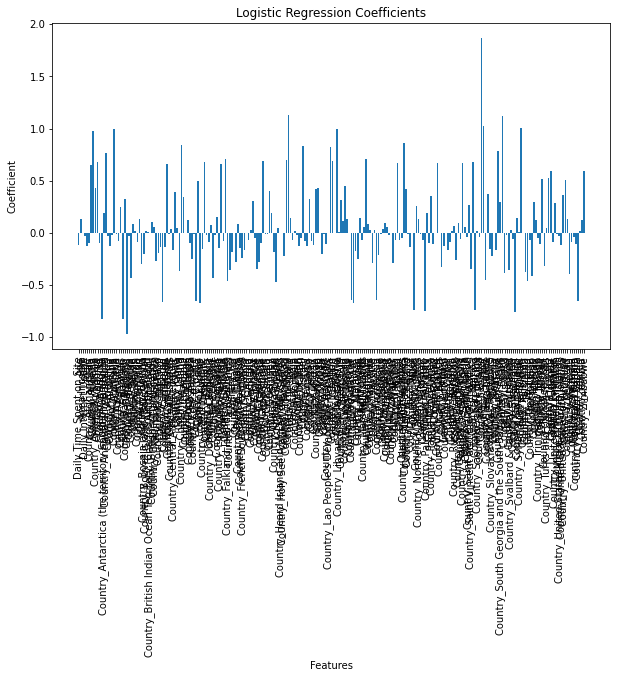

In [171]:

# Assuming you have trained your logistic regression model and stored it in the 'model' variable

# Get the coefficients or feature importance from the model
coefficients = lm.coef_[0]

# Get the corresponding feature names
feature_names = X.columns

# Create a bar plot to visualize the coefficients
plt.figure(figsize=(10, 6))
plt.bar(feature_names, coefficients)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.title('Logistic Regression Coefficients')
plt.show()